# TD noté, 27 novembre 2012 (coloriage, correction)

On spécifie d'abord que les graphiques doivent être insérés dans le notebook et on change le stype des greaphiques.

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

## construction de la spirale

On utilise une représentation paramétrique de la spirale : [spirale](https://fr.wikipedia.org/wiki/Spirale).

In [ ]:
import math
 
# cette fonction construit deux spirales imbriquées dans une matrice nb x nb
# le résultat est retourné sous forme de liste de listes
def construit_matrice (nb) :
    mat = [ [ 0 for x in range (0,nb) ] for y in range(0,nb) ]
 
    def pointij (nb,r,th,mat,c,phase) :
        i,j = r*th * math.cos(th+phase), r*th*math.sin(th+phase)
        i,j = int(i*100/nb), int(j*100/nb)
        i,j = (i+nb)//2, (j+nb)//2
        if 0 <= i < nb and 0 <= j < nb :
            mat[i][j] = c
        return i,j
 
    r = 3.5
    t = 0
    for tinc in range (nb*100000) :
        t  += 1.0 * nb / 100000
        th  = t * math.pi * 2
        i,j = pointij (nb,r,th,mat,1, 0)
        i,j = pointij (nb,r,th,mat,1, math.pi)
        if i >= nb and j >= nb : break
         
    return mat

matrice = construit_matrice(100)

## dessin de la spirale

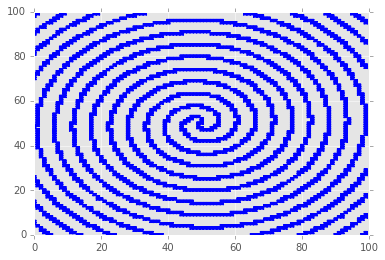

In [ ]:
import matplotlib.pyplot as plt

def dessin_matrice (matrice) :
    f, ax = plt.subplots()
    ax.set_ylim([0, len(matrice[0])])
    ax.set_xlim([0, len(matrice)])
    colors = { 1: "blue", 2:"red" }
    for i in range(0,len(matrice)) :
        for j in range (0, len(matrice[i])) :
            if matrice [i][j] in colors : 
                ax.plot ([i-0.5,i-0.5,i+0.5,i+0.5,i-0.5,i+0.5,i-0.5,i+0.5], 
                            [j-0.5,j+0.5,j+0.5,j-0.5,j-0.5,j+0.5,j+0.5,j-0.5], 
                        colors [ matrice[i][j] ])
    return ax
    
dessin_matrice(matrice)

## Q1

In [ ]:
def voisins_a_valeurs_nulle (matrice,i,j) :
    res = []
    if i > 0                 and matrice[i-1][j] == 0 : res.append ( (i-1,j) )
    if i < len(matrice)-1    and matrice[i+1][j] == 0 : res.append ( (i+1,j) )
    if j > 0                 and matrice[i][j-1] == 0 : res.append ( (i,  j-1) )
    if j < len(matrice[i])-1 and matrice[i][j+1] == 0 : res.append ( (i,  j+1) )
    return res

## Q2

In [ ]:
def tous_voisins_a_valeurs_nulle (matrice, liste_points) :
    res = []
    for i,j in liste_points :
        res += voisins_a_valeurs_nulle (matrice, i,j) 
    return res

## Q3

In [ ]:
def fonction_coloriage ( matrice, i0, j0) :
    # étage 1
    acolorier = [ ( i0, j0 ) ]
    while len (acolorier) > 0 :
        # étape 2
        for i,j in acolorier : 
            matrice [i][j] = 2
        # étape 3
        acolorier = tous_voisins_a_valeurs_nulle ( matrice, acolorier )
        # on enlève les doublons car sinon cela prend trop de temps
        acolorier = list(set(acolorier))

## Q5

### version 1

In [ ]:
def surface_coloriee (matrice) :
    surface = 0
    for line in matrice : 
        for c in line : 
            if c == 2 : surface += 1
    return surface

### version 4

In [ ]:
def fonction_coloriage_1000 ( matrice, i0, j0) :
    acolorier = [ ( i0, j0 ) ]
    nb = 0                                 # ligne ajoutée
    while len (acolorier) > 0 :
        for i,j in acolorier : 
            matrice [i][j] = 2
            nb += 1                        # ligne ajoutée
        if nb > 1000 : break               # ligne ajoutée
        acolorier = tous_voisins_a_valeurs_nulle ( matrice, acolorier )
        d = { }
        for i,j in acolorier : d [i,j] = 0
        acolorier = [ (i,j) for i,j in d ]

## Q4 : spirale

### version 1

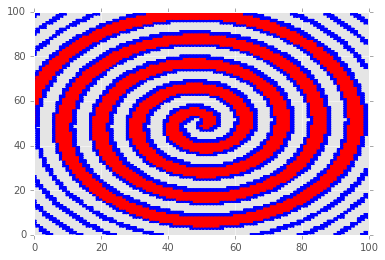

In [ ]:
matrice = construit_matrice(100)
fonction_coloriage  (matrice, 53, 53)
dessin_matrice(matrice)

In [ ]:
surface_coloriee (matrice)

3258

### version 4

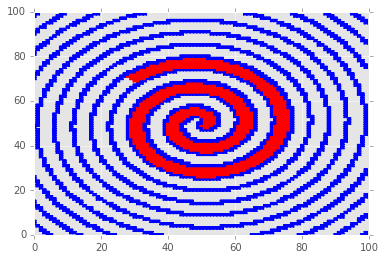

In [ ]:
matrice = construit_matrice(100)
fonction_coloriage_1000  (matrice, 53, 53)
dessin_matrice(matrice)

In [ ]:
surface_coloriee (matrice)

1002